<a href="https://colab.research.google.com/github/wsh32/machine_learning/blob/main/modules/03/Assignment_03_Companion_2021f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning: Module 1 (Fall 2021)
# Assignment 03 Companion Notebook

##Linear regression and residuals

In the last assignment, you implemented linear regression and calculating the sum of the squared errors. We supply those for you in the code below, and we generate some toy data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def linear_regression(X, y):
     """ Returns the optimal weights in the least squares sense for the specified
         training inputs (X) and training outputs (y) """
     # You could instead use w, _, _, _ = np.linalg.lstsq(X, y, rcond=-1) and return w, feel free to look up the details of this function.
     return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

def sum_of_squared_errors(X, y, w):
    """
    Return the sum of squared errors for the given training data (X, y) and
    model parameters w.

    >>> sum_of_squared_errors(np.array([[1, 4, 3],\
                                        [2, -1, 4]]),\
                              np.array([3, 4]),\
                              np.array([1, 2, 3]))
    289
    """
    e = X.dot(w) - y
    return e.dot(e)

# Generate some toy data
n_points = 50
X = np.random.randn(n_points,1) # Random data for x
X = np.hstack((X,X + np.random.randn(n_points,1)*0.8))
w_true = np.array([-5, 10]) #These are the "true" weights we're using to create our y values
# we'll apply a Gaussian noise with a standard deviation of 0.5 to the outputs to make it more interesting
y = X.dot(w_true) + np.random.randn(n_points,)*0.5

It's often wise to plot your data. This will give you a sense of it's shape and show you if there are any major outliers that could affect your results. (Here those are unlikely, since we generated the data ourselves, but this is good practice, so we'll do it). 

Colab does not support interactive plots for matplotlib, but you can change the view angle by manipulating `ax.view_init`. The first value in `ax.view_init` is the elevation (up/down) and the second is the azimuth (left/right) both in degrees.

What do you observe about these data?

> The data is mostly linear

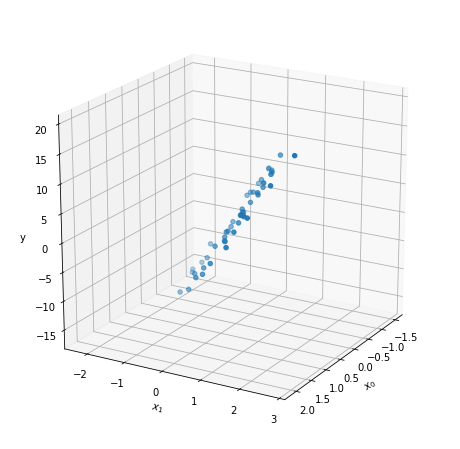

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d',)
ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('y')
#Change the view angle to get 
ax.view_init(20,30) # View for regular 3d
#ax.view_init(0,90) # View for X0
#ax.view_init(0,0) # View for X1
#ax.view_init(90,-90) # View from the top
plt.show()

In class we talked about confounding variables. From looking at the graph, you should be able to see that X0 and X1 are correlated and they both have a relationship with y (which we created using w_true). Now, we'll observe how including both variables (X0 and X1) or just one of them affect our model by calculating the weights and the sum of squared errors.

In [5]:
# linear regression with both variables
w_both = linear_regression(X,y)
sse_both = sum_of_squared_errors(X,y,w_both)
print('w_both weights: ', w_both, " with sum of squared errors of: ",sse_both)

# linear regression w/ only one of the two terms
w_onlyX0 = linear_regression(X[:,[0]],y) #Note the funky indexing to make the array the right size
sse_onlyX0 = sum_of_squared_errors(X[:,[0]],y,w_onlyX0)
w_onlyX1 = linear_regression(X[:,[1]],y)
sse_onlyX1 = sum_of_squared_errors(X[:,[1]],y,w_onlyX1)
print('w_onlyX0 weights: ', w_onlyX0, " with sum of squared errors of: ",sse_onlyX0)
print('w_onlyX1 weights: ', w_onlyX1, " with sum of squared errors of: ",sse_onlyX1)



w_both weights:  [-5.00493478  9.98863914]  with sum of squared errors of:  8.453326643735632
w_onlyX0 weights:  [2.97503333]  with sum of squared errors of:  2585.9866989879374
w_onlyX1 weights:  [6.68613879]  with sum of squared errors of:  542.9415152667683


Residuals refer to the error (or what's left over or residual, after you subtract the true values of y from your prediction).  Residuals are often plotted on a graph with the true labels (y) on the x-axis and the residuals on the y-axis. 

### **Notebook Exercise 1** (30 minutes)
(a) Make a scatter plot of the residuals for the model that includes both features (columns) of X. What do you observe?  

> Residuals are kinda all over the place, but relatively small (+/- 1)

(b) Now add the residuals of the model that only includes X[:,[0]]. What do you observe and why?

> Residuals are linear and much larger (+/- 15)

(c) Now add the residuals of the model that only includes X[:,[1]]. What do you observe?

> Residuals are all over the place again, and significantly large (+/- 6)

(d) How do the patterns you observe in the residuals relate to the sum of squared errors that we calculated above?

> Higher sum of squared errors correlates to higher residuals

Text(0.5, 1.0, 'Residual plot with w_both')

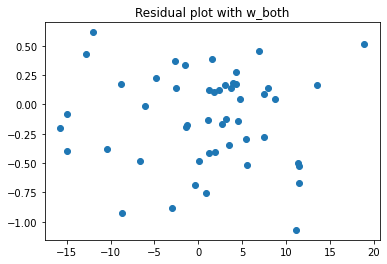

In [7]:
# Plot for w_both
y_pred_both = X.dot(w_both)
residual_both = y_pred_both - y

plt.scatter(y, residual_both)
plt.title("Residual plot with w_both")

Text(0.5, 1.0, 'Residual plot with w_onlyX0')

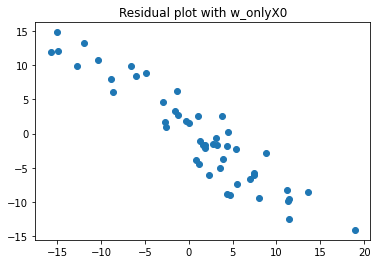

In [12]:
# Plot for w_X0
y_pred_X0 = X[:, 0] * w_onlyX0
residual_X0 = y_pred_X0 - y

plt.scatter(y, residual_X0)
plt.title("Residual plot with w_onlyX0")

Text(0.5, 1.0, 'Residual plot with w_onlyX1')

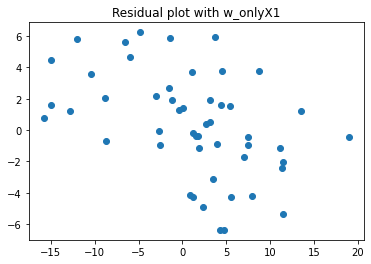

In [13]:
# Plot for w_X1
y_pred_X1 = X[:, 1] * w_onlyX1
residual_X1 = y_pred_X1 - y

plt.scatter(y, residual_X1)
plt.title("Residual plot with w_onlyX1")

####*Expand for hint*

You will need to calculate the predicted y for each situation. 
You will also need to pay attention to the size of the weights and which column of X they go with. 
You can use np.shape(X) to find the shape of any array, which is not specifically needed for this exercise, but may be helpful for your understanding.

####*Expand for solution*

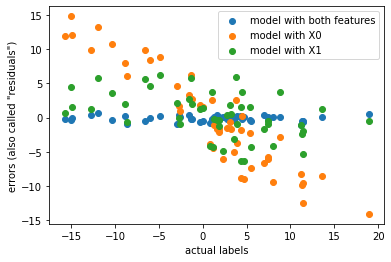

In [14]:
# Plot the residuals
plt.scatter(y, X.dot(w_both)- y)
plt.scatter(y, X[:,[0]].dot(w_onlyX0)- y)
plt.scatter(y, X[:,[1]].dot(w_onlyX1)- y)

plt.xlabel('actual labels')
plt.ylabel('errors (also called "residuals")')
plt.legend(['model with both features', 'model with X0', 'model with X1'])
plt.show()

(a) You should see randomly scattered points above and below 0 on the y-axis. There should be no clear pattern to these data.

(b) When I run this, I see data points scattered with a negative slope. The value for `w_onlyX0` is positive, even though the actual relationship (first element of `w_true`) is negative. We see this error appear in the residuals. 

(c) I see data points scattered with more error than the model with both features, but somewhat less of a pattern. The value for `w_onlyX1` is closer to correct (but dampened by the effects of X0 and its negative coefficient on y). 

(d) We can see that the larger the sum of the squared error, the more the residuals are different than zero. This should make sense because the sum of the squared errors is calculated by squaring each residual and adding them up; hence the name "sum of the squared error".

### Linear Regression on Non-linear Functions

Provided you know the form of the non-linear function you are fitting, you can use linear regression to fit arbitrary non-linear functions.

In the code below we will explore an example where the $y_i = w^\top x_i+x_{i,1}^2$. We'll create modified feature vector $\mathbf{\tilde{x}} = \begin{bmatrix} x \\ x^2 \end{bmatrix}$, and apply linear regression to those vectors.  You'll see that the linear regression with the additional feature will match much better to the training data (have a lower error) than the one where we don't allow for this new feature.

w_estimated [6.94680904]
Sum of squares for original model 737.8635422133676
w_estimated_augmented [3. 1.]
Sum of squares for augmented model 2.0709570914314612e-27


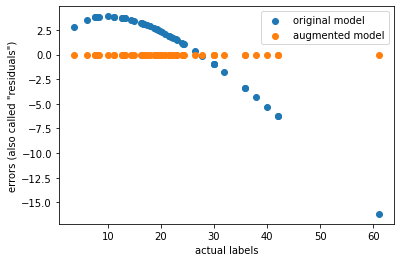

In [15]:
# Generate NEW toy data
n_points = 50
X = np.random.randn(n_points,1) + 3
w_true = np.array([3])
y = X.dot(w_true.T) + np.square(X[:,0])
w_estimated = linear_regression(X, y)
original_model_preds = X.dot(w_estimated)
print("w_estimated", w_estimated)
print("Sum of squares for original model", np.sum(np.square(original_model_preds - y)))

X_augmented = np.column_stack((X, np.square(X[:,0]))) #this creates the modified feature vector defined above
w_estimated_augmented = linear_regression(X_augmented, y)
print("w_estimated_augmented", w_estimated_augmented)

augmented_model_preds = X_augmented.dot(w_estimated_augmented)
print("Sum of squares for augmented model", np.sum(np.square(augmented_model_preds - y)))
plt.scatter(y, original_model_preds - y)
plt.scatter(y, augmented_model_preds - y)
plt.xlabel('actual labels')
plt.ylabel('errors (also called "residuals")')
plt.legend(['original model', 'augmented model'])
plt.show()

### **Notebook Exercise 2** (15 minutes)

(a)  Explain the observed differences in the sum of squares error for the two models.  Why is the augmented model more accurate?

> The augmented model is far more accurate because it adds in another level (X^2) for the nonlinear component

(b)  In the original model, the coefficient estimated for the input feature is much higher than the true value (roughly twice as large).  Explain why this occurs and why the augmented model doesn't have this problem?

> The original model needs to account for the X^2 factor using the linear term

(c)  If you were applying linear regression to a real problem, how might you determine features to add to your model to capture non-linearities?  There are many right answers to this, so you should be thinking of this as an open-ended question rather than one with a specific right answer.

> One way is to observe the data and figure out manually what the power of the model is. We can also understand where the data comes from and make educated guesses at what the data should look like.

#### *Expand for Solution*

***Solution***

(a) The augmented model is much more accurate (has a lower sum of squares) because due to the additional feature it can model the non-linear behavior in the training data.

(b) The original model is forced to artificially inflate the weight placed on the input feature to compensate for not being able to model the non-linear (quadratic behavior).  It winds up overestimating the outputs for low input values and underestimating them for high input values.  Since the augmented model has the quadratic feature, it can properly assign weight to that feature and keep the weight on the original feature at the appropriate value.

(c)  There are lots of ways to do this.  Here are three (we know you'll come up with more good ideas):
- See if there are any patterns in the plot of model residuals (e.g., the plot above shows a quadratic pattern in the errors, which might point towards the need to add a quadratic feature).
- Use domain-specific knowledge.  For instance, there might be a reason why you expect a particular non-linear behavior to show up (e.g., you are modeling data that is periodic, such as temperature fluctuations over the year, and you know there is some sinusoidal behavior).
- You can use brute force search to try a bunch of different non-linearities and see which ones fit the data the best (there are a lot of machine learning models that work like this).

## Training Test Splits: Bikeshare Revisited

In this next section of the notebook we're going to revisit the dataset that we met in the last assignment.  Our goals in this activity are twofold.

1.  We will introduce the notion of a train / test split for validating machine learning algorithms.
2.  We will motivate, derive, and implement an extension to linear regression called [ridge regression](https://en.wikipedia.org/wiki/Tikhonov_regularization).

For your convenience, here is the text from the previous notebook that we used to introduce the dataset.
> The [Bikeshare](https://archive.ics.uci.edu/ml/datasets/bike%20sharing%20dataset) dataset contains daily usage data over a roughly two year period. Along with each record of user counts, there are independent variables that measure various characteristics of the day in question (e.g., whether it was a weekday or a weekend, the air temperature, the wind speed).

The code below loads the dataset and produces hexplots that show various characteristics of the day versus ridership.


In [ ]:
import pandas as pd
bikeshare = pd.read_csv('https://raw.githubusercontent.com/kylecho/nd101_p1_neural_network/master/Bike-Sharing-Dataset/day.csv')

X_bikeshare = bikeshare.drop(columns=['instant', 'dteday', 'cnt', 'registered', 'casual'])
y_bikeshare = bikeshare['cnt']
X_bikeshare['bias'] = 1

plt.figure(figsize=(30, 18))
for idx, col in enumerate(X_bikeshare):
    plt.subplot(3, 4, idx+1)
    plt.hexbin(X_bikeshare[col], y_bikeshare, gridsize=25, cmap='jet',mincnt=1)
    plt.colorbar()
    plt.xlabel(col)
    plt.ylabel('rider count')

plt.subplots_adjust(wspace=.2)
plt.show()

### Training and Testing Sets

You have already observed the importance of splitting your data into a training and testing set and implemented this split in Python to do classification. The next three paragraphs provide a little refresher. You can skip them if you wish.

One of the most fundamental ideas in evaluating a machine learning algorithm involves partitioning data into a training set (used for fitting a model) and a testing set (used for estimating the performance of the model).  There is a pretty comprehensive article on [training, validation, and testing sets](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets) on Wikipedia, but for now we are not going to be talking about the validation set.  Feel free to follow along with our text here and keep the link handy for future reference (no need to read the linked article now).

Recall the basic supervised learning problem setup where we are given a training data consisting of inputs $\mathbf{x_1}, \mathbf{x_2}, \ldots, \mathbf{x_n}$ and outputs $y_1, y_2, \ldots, y_n$.  So far we have been applying our learning algorithms to *all* $n$ of the training data instances.  We might be tempted to estimate how well the resultant model would work on new data by computing the average squared error on these $n$ training instances.  It turns out that this approach can wildly overestimate how well the model will work on new data.  The reason is that the model parameters (e.g., the weights in linear regression) have been tuned to the training data.  Some of these model parameters will reflect genuine relationships between the inputs and outputs, and other model parameters may largely reflect particular quirks of the training data (e.g., noise) that are not applicable to new data.

In order to get an unbiased estimate of the performance of the model on new data we reserve a portion of the training data as a ***testing set***.  This testing set is not used to fit the model parameters and is only used to estimate model performance *after the model has been created*.

To make the code less cluttered, we will be using a helper function from the [`scikit-learn`](https://scikit-learn.org/stable/) library that creates a [training set / testing set split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split).  This function will ***randomly*** partition the given data into two disjoint sets: the training set and the testing set.  The parameter `test_size` controls the fraction of data assigned to the testing set versus the training set.  You'll also notice that we divide the `sum_of_squared_errors` by `y_train.shape[0]`, which is the number of training data instances.  Divided the sum of squared error by the number of training data instances gives us the *mean squared error.*  The mean squared error is more interpretable than the sum of squared errors since it controls for the number of data instances.

#### Notebook Exercise 3 (30 minutes)

Run the code below several times in order to answer the following questions.

<ol type="a">
<li>What causes the results to change from run to run?</li>

<li>As you run the code multiple times, does there seem to be a trend that the performance on the training set is better (i.e. has lower mean squared error) than the performance on the testing set?</li>

<li>Since the training set was used to fit the model parameters, we might expect the training set to always have better performance than the testing set.  It appears that this is not always the case.  How is this possible?</li>
</ol>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_bikeshare, y_bikeshare, test_size=0.5)
print("number of training points %d, number of testing points %d" % (y_train.shape[0], y_test.shape[0]))
w = linear_regression(X_train, y_train)

print("training set mean squared error=%.2f" % (sum_of_squared_errors(X_train, y_train, w)/y_train.shape[0]))
print("testing set mean squared error=%.2f" % (sum_of_squared_errors(X_test, y_test, w)/y_test.shape[0]))

##### Expand for Solution

***Solution***

<ol type="a">
<li>The changes in output are driven by randomness in the `train_test_split` function.  Depending on which instances are assigned to the training versus the testing set, the output will differ.</li>

<li>It does appear that, on average, the performance on the testing set is worse.</li>

<li>On any given run it does not follow that performance on the testing set will always be worse.  It could be the case that the testing set happened to contain a lot of easy to predict instances and the training set contained a high number of outliers.</li>
</ol>

## Ridge Regression

So far we've been working with this Bikeshare dataset in cases where we have a relatively high number of training instances compared with the dimensionality of the data.  To make this more precise, the shape of `X_train` is 365 by 12, which means we have ratio of roughly 30:1 training instances to inputs features.  While there are no hard and fast rules about this, a 30:1 ratio is considered pretty good for coming up with good esitmates of model parameters.

Suppose instead that we faced a situation where we had very little training data.  To simulate this case, **update the code below to rerun our experiment with the BikeShare dataset but set the `test_size` to 0.95.** You should notice two things when running this code.

1.  The performance on the training set is markedly better than the testing set.
2.  Occasionally you will get an error message about a singular matrix.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bikeshare, y_bikeshare, test_size=0.5)
print("number of training points %d, number of testing points %d" % (y_train.shape[0], y_test.shape[0]))
w = linear_regression(X_train, y_train)

print("training set mean squared error=%.2f" % (sum_of_squared_errors(X_train, y_train, w)/y_train.shape[0]))
print("testing set mean squared error=%.2f" % (sum_of_squared_errors(X_test, y_test, w)/y_test.shape[0]))

The first observation (that the performance on the training set is markedly better than the testing set) is perhaps not very surprising since we now have much less training data to use to reliably estimate the model parameters.  To understand the second observation, we need remind ourselves of the formula for the optimal weights in linear regression.

$$\mathbf{w^\star} = \left ( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}$$

The error regarding a singular matrix is coming from the fact that we are computing the inverse of the matrix $\mathbf{X}^\top \mathbf{X}$.  One property of a [singular matrix](http://mathworld.wolfram.com/SingularMatrix.html) is that it is not invertible, hence the error message.  The reason it is not invertible is that the matrix $\mathbf{X}^\top \mathbf{X}$ is not [full rank](https://en.wikipedia.org/wiki/Rank_(linear_algebra)).  This happens when the training data does not properly span the space of the features.  This usually happens for a combination of the following reasons:

1.  There is too little training data
2.  There are features that are defined as linear combinations of each other.

In order to solve this problem, a common approach is to modify the linear regression problem to prefer solutions that have small weights.  We do this by penalizing the sum of the squares of the weights themselves.  This is called ridge regression (or Tikhonov regularization).  Below, we show the original version of ordinary least squares along with ridge regression.

Ordinary least squares:
$$\begin{align}
\mathbf{w^\star} &= \arg\min_\mathbf{w} \sum_{i=1}^n \left ( \mathbf{w}^\top \mathbf{x_i} - y_i \right)^2 \\
&= \arg\min_\mathbf{w} \left ( \mathbf{X}\mathbf{w} - \mathbf{y} \right)^\top \left ( \mathbf{X}\mathbf{w} - \mathbf{y} \right)
\end{align}$$

Ridge regression (note that $\lambda$ is a non-negative parameter that controls how much the algorithm cares about fitting the data and how much it cares about having small weights):
$$\begin{align}
\mathbf{w^\star} &= \arg\min_\mathbf{w} \sum_{i=1}^n \left ( \mathbf{w}^\top \mathbf{x_i} - y_i \right)^2 + \lambda\sum_{i=1}^d w_i^2 \\
&= \arg\min_\mathbf{w} \left ( \mathbf{X}\mathbf{w} - \mathbf{y} \right)^\top \left ( \mathbf{X}\mathbf{w} -  \mathbf{y} \right) + \lambda \mathbf{w}^\top \mathbf{w}
\end{align}$$

The penalty term may seem a little arbitrary, but it can be motivated on a conceptual level pretty easily.  The basic idea is that in the absence of sufficient training data to suggest otherwise, we should try to make the weights small.  Small weights have the property that changes to the input result in minor changes to our predictions, which is a good default behavior.

In a moment, we'll go back to the main text of the assignment and derive an expression to compute the optimal weights to the ridge regression problem, but first, we'll motivate this derivation by trying it out on our Bikeshare dataset to see if it helps.


### Notebook Exercise 4 (20 minutes)

When we used classic linear regression on our Bikeshare dataset with 95% of our data acting as test data, we ran into problems of poor fitting and an occasional error due to singularity. 

The code below implements ridge regression for you. We will play around with this implementation and manipulate the value of lambda ($\lambda$) to get a sense of what this variable does. 

(Spoiler alert: The code below includes the equation that you'll derive in the next exercise. If you prefer to derive and implement ridge regression yourself, please feel free.)

Here are some questions to test your understanding of the effects of applying ridge regression to the bike share dataset.

<ol type="a">
<li>Run the code below with the default setting of the input `lam`.  You should notice that singular matrix error does not arise anymore.  Make the value of `lam` really large (search over different orders of magnitude to find a value that is really large).  What happens to the training and test set errors?</li>

<li>Does there seem to be a value of `lam` that is best (we advise you to search over different orders of magnitude)?  How do you define best?  What would be a good process for determining a good value of `lam` (we'll be learning about this in much more detail coming up, but we wanted to get you thinking about some possibilities)?</li>
</ol>

In [ ]:
def ridge_regression(X, y, lam):
     """ Returns the optimal weights in the least squares sense for the specified
         training inputs (X) and training outputs (y) with ridge term `lam` """
     return np.linalg.inv(X.T.dot(X) + lam*np.eye(X.shape[1])).dot(X.T).dot(y)
     
X_train, X_test, y_train, y_test = train_test_split(X_bikeshare, y_bikeshare, test_size=0.95)
print("number of training points %d, number of testing points %d" % (y_train.shape[0], y_test.shape[0]))

w = ridge_regression(X_train, y_train, 1)
print("training set mean squared error=%.1f" % (sum_of_squared_errors(X_train, y_train, w)/y_train.shape[0]))
print("testing set mean squared error=%.1f" % (sum_of_squared_errors(X_test, y_test, w)/y_test.shape[0]))

#### Expand for Solution

***Solution***

(a) When you make lambda really big, the errors become very large.  This is because the model is underfitting to the data.  In other words, it cares more about making the weights small than it does about fitting the data.

(b) It's pretty hard to tell, but it seems like a value around $0.0001$ seems to work pretty well.  We defined best by mentally averaging over the testing mean squared error measured across a few runs.  In order to do this more rigorously you'd want to have a defined space of values you'd search over, repeat the experiment a number of times, and then choose the best average performance.  We'll dig into this more systematically soon, but this is a good amount answer to get to with the current tools we have discussed.

###Back to the main assignment document.
Great work so far, now let's go back to the main assignment document for some more math fun.